### Twitter has become a wildly sprawling jungle of information. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to concisely capture the essence of the data.

### In this project, a Python script has been created to perform a sentiment analysis of the Twitter activity of various news oulets,BBC, CBS, CNN, Fox, and New York times. The final output presents a visualized summary of the compound score of sentiments expressed in Tweets sent out by these news outlets.

### For this project, various python packages such as tweepy, pandas, matplotlib, seaborn, numpy, VADER etc. have been used.

In [1]:
# set up the dependencies
import tweepy
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pprint import pprint
from datetime import datetime
from matplotlib import style
style.use('seaborn')
from matplotlib.ticker import IndexFormatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# set twitter api authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [3]:
# instatiate the SentimentIntensityAnalyzer class
analyzer = SentimentIntensityAnalyzer()

In [4]:
# declare the target search terms in a list
target_terms = ["@BBCWorld","@CBSNews","@CNN","@FoxNews","@nytimes"]

In [5]:
# define an empty list to hold the average of compound sentiment score for various news outlets
average_news_sentiments_list = []

# define another empty list to hold different news sentiments and other tweet stats for various news otlets
news_sentiments_list = []

# loop through the search terms in the target terms list
for term in target_terms:
    # define lists to hold different results from the api call to twitter
    oldest_tweet = None
    compound_score = []
    positive_score = []
    negative_score = []
    neutral_score = []
    Tweet_date = []
    Tweet_text = []
    Tweet_ago = []
    Tweet_source_account = []
    counter = 1
    
    # Loop to get a total of 100 tweets from each news outlet
    for x in range(5):
        public_tweets = api.user_timeline(term,count=20,max_id=oldest_tweet)
        
        # Loop through the tweets and save tweet stats in different lists declared above
        for tweet in public_tweets:
            Tweet_ago.append(counter)
            Tweet_date.append(tweet["created_at"])
            Tweet_text.append(tweet["text"])
            Tweet_source_account.append(tweet["user"]["screen_name"])
            result = analyzer.polarity_scores(tweet["text"])
            compound_score.append(result["compound"])
            positive_score.append(result["pos"])
            negative_score.append(result["neg"])
            neutral_score.append(result["neu"])
            
            # increment the counter by 1 every time a tweet stats are saved in the lists
            counter+=1
        
        # update the oldest tweet to ensure that there is no repitition of tweets between successive api calls
        oldest_tweet = tweet["id"]-1
    
    # create a dictionary to save the results
    news_sentiments = {"Tweet_source":Tweet_source_account,
              "Tweet Date":Tweet_date,
              "Tweet text":Tweet_text,
              "Tweet ago":Tweet_ago,
              "Compound Score":compound_score,
              "Positive Score":positive_score,
              "Negative Score":negative_score,
              "Neutral Score":neutral_score
                      }
    
    # append the news sentiments list with the dictionary
    news_sentiments_list.append(news_sentiments)
    
    # create another dictionary to svae the average sentiment results
    average_news_sentiments = {"Tweet_source":term,
                               "Average Compound Score":np.mean(compound_score)}

    # append the average news sentiments list with the above dictionary
    average_news_sentiments_list.append(average_news_sentiments)

    

In [6]:
# create separate dataframes for different news outlets
df_0 = pd.DataFrame(news_sentiments_list[0])
df_1 = pd.DataFrame(news_sentiments_list[1])
df_2 = pd.DataFrame(news_sentiments_list[2])
df_3 = pd.DataFrame(news_sentiments_list[3])
df_4 = pd.DataFrame(news_sentiments_list[4])


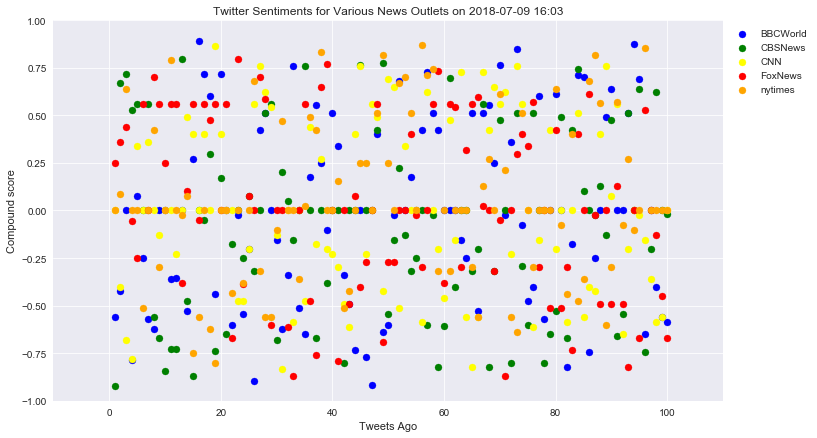

In [7]:
# plot the _compound_ sentiment of each tweet against its relative timestamp as a scatter plot
current_time = datetime.now().strftime("%Y-%m-%d %H:%M")
fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(df_0["Tweet ago"],df_0["Compound Score"],color="blue",label="BBCWorld")
ax.scatter(df_1["Tweet ago"],df_1["Compound Score"],color="green",label="CBSNews")
ax.scatter(df_2["Tweet ago"],df_2["Compound Score"],color="yellow",label="CNN")
ax.scatter(df_3["Tweet ago"],df_3["Compound Score"],color="red",label="FoxNews")
ax.scatter(df_4["Tweet ago"],df_4["Compound Score"],color="orange",label="nytimes")
ax.grid(linestyle="-",alpha=0.8)
ax.set_xlim(-10,110)
ax.set_ylim(-1,1)
ax.set_xlabel("Tweets Ago")
ax.set_ylabel("Compound score")
ax.set_title(f"Twitter Sentiments for Various News Outlets on {current_time}")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

# save the image
plt.savefig("SentimentsAnalysis_ScatterPlot.png")

In [8]:
# craete a dataframe for average sentiments
average_sentiments_df = pd.DataFrame(average_news_sentiments_list)
average_sentiments_df = average_sentiments_df.set_index("Tweet_source")
average_sentiments_df

,Average Compound Score
Tweet_source,
@BBCWorld,-0.009604
@CBSNews,-0.073230
@CNN,0.016038
@FoxNews,0.026553
@nytimes,0.052880


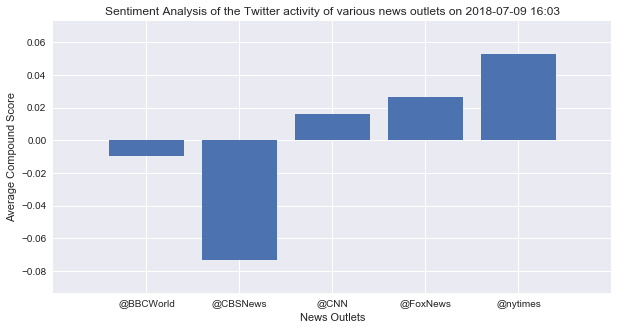

In [9]:
# plot the average sentiments as a bar chart
# current_time = datetime.now().strftime("%Y-%m-%d %H:%M")
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(average_sentiments_df.index,average_sentiments_df["Average Compound Score"])
ax.set_xlabel("News Outlets")
ax.set_ylabel("Average Compound Score")
ax.set_title(f"Sentiment Analysis of the Twitter activity of various news outlets on {current_time}")
ax.set_xlim(-1,5)
ax.set_ylim(min(average_sentiments_df["Average Compound Score"])-0.02,max(average_sentiments_df["Average Compound Score"])+0.02)

# save the image
plt.savefig("SentimentsAnalysis_BarChart.png")